# Исследовательский анализ объявлений о продаже квартир

В распоряжении следующие данные: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
Необходимо определить рыночную стоимость объектов недвижимости. Задача — установить параметры, которые впоследствии позволят построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Шаг 1. Открыть файл с данными и изучить общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')

In [2]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB
None
  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                         

Загрузив данные в датафрейм и вызвав функции info() и head() обнаружил, что разделите в данном файле csv оказались не запятые (','), а табуляция '\t'. Поэтому придётся переписать значение переменной data, прочитав файл еще раз, но с указанием разделителя (sep='\t').

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Теперь данные выгружены в приемлемом виде датафрейма.

#### Вывод:
В датафрейме 22 столбца и 23699 строк. Во многих столбцах присутствуют пропущенные (NaN) значения. Многие столбцы представлены типом данных float, при этом, логичнее было бы перевести их в целочисленные значения (int). Датафрейм требует операций по предобработке.

#### Шаг 2. Предобработка данных

Начну с поиском и заполнением пропущенных значений. Первый столбец, который исследую - is_apartment (с булевым типом данных)

In [5]:
print(data['is_apartment'].unique())

[nan False True]


Предположу, что если информация о том, что выставленный лот - апартаменты, отсутствует, - значит, это не апартаменты. Соответственно, заменю пропущенные значения в этом столбце на False.

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [7]:
# Проверю, сработала ли замена:
print(data['is_apartment'].unique())

[False  True]


Теперь займусь столбцом balcony, в котором указана информация о количестве балконов в квартире. Проверю уникальные значения

In [8]:
print(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [9]:
print(data['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


Также предположу, что если информация о количестве балконов отсутствует, то, скорее всего, балконов в этих квартирах просто нет. Заменю пропущенные значения на 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0)

In [11]:
print(data['balcony'].unique())

[0. 2. 1. 5. 4. 3.]


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Теперь ситуация посложнее - с пропущенными значениями в столбцах "жилая площадь" (living_area) и "площадь кухни" (kitchen_area). Для того, чтобы понять, чем можно заменить пропуски, сделаю сводную таблицу этих значений (заодно и по общей площади квартиры, total_area) по параметру "количество комнат" (rooms). Посчитаю сразу средние и медианные значения 3-х параметров.

In [13]:
data.pivot_table(index='rooms', values = ['total_area', 'living_area', 'kitchen_area'], aggfunc=['mean', 'median'])

mean                               median                       
      kitchen_area living_area  total_area kitchen_area living_area total_area
rooms                                                                         
0              NaN   18.865246   29.279746          NaN      18.000      26.05
1         9.550118   17.893552   37.644669         9.04      17.600      36.56
2         9.979584   31.736849   55.855089         8.80      30.500      53.00
3        11.308580   47.387941   77.764580         9.50      45.000      73.00
4        13.664033   66.983223  107.610763        11.10      63.600      99.30
5        18.367649  100.009247  161.474816        15.10      91.785     146.45
6        21.048763  130.983636  201.537619        19.50     123.900     184.30
7        21.998077  163.564151  265.325424        20.00     145.000     214.00
8        24.866667  168.683333  259.233333        25.00     161.000     235.70
9        25.071429  190.257143  305.975000        14.30     179.200     300.95
10       22.866667  165.566667  259.566667        19.80     161.400     272.60
11       12.600000  133.900000  188.900000        12.60     133.900     188.90
12      112.000000  409.700000  900.000000       112.00     409.700     900.00
14       21.250000  195.150000  304.200000        21.25     195.150     304.20
15      100.000000  409.000000  590.000000       100.00     409.000     590.00
16       13.000000  180.000000  270.000000        13.00     180.000     270.00
19       27.600000  264.500000  374.600000        27.60     264.500     374.60

Решил заменить пропущенные значения в living_area и kitchen_area медианными значениями, полученными для квартир в разрезе количества комнат. Для этого сначала создам новый датафрейм - better_data - чтобы рассчитать эти параметры без пропущенных строк.

In [14]:
better_data = data.copy()

In [15]:
better_data = better_data.dropna(subset=['kitchen_area', 'living_area'])

In [16]:
print(better_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20982 entries, 0 to 23698
Data columns (total 22 columns):
total_images            20982 non-null int64
last_price              20982 non-null float64
total_area              20982 non-null float64
first_day_exposition    20982 non-null object
rooms                   20982 non-null int64
ceiling_height          13336 non-null float64
floors_total            20943 non-null float64
living_area             20982 non-null float64
floor                   20982 non-null int64
is_apartment            20982 non-null bool
studio                  20982 non-null bool
open_plan               20982 non-null bool
kitchen_area            20982 non-null float64
balcony                 20982 non-null float64
locality_name           20943 non-null object
airports_nearest        16308 non-null float64
cityCenters_nearest     16329 non-null float64
parks_around3000        16330 non-null float64
parks_nearest           7266 non-null float64
ponds_around3000

Сделаю по датафрейму better_data аналогичную сводную таблицу. В него не будет уже включены квартиры-студии - что логично: ведь в студиях жилая площадь включает в себя и площадь кухни.

In [17]:
better_data_grouped = better_data.pivot_table(index='rooms', values = ['total_area', 'living_area', 'kitchen_area'], aggfunc=['mean', 'median'])
better_data_grouped

mean                               median                       
      kitchen_area living_area  total_area kitchen_area living_area total_area
rooms                                                                         
1         9.518178   17.880307   37.733649         9.00       17.60      36.80
2         9.918594   31.704335   55.715265         8.70       30.50      53.00
3        11.250916   47.354498   77.388570         9.50       45.00      72.70
4        13.558296   66.820640  106.617062        11.00       63.50      98.90
5        18.381906  100.808993  161.236727        15.25       93.05     147.35
6        20.851354  130.998750  201.159896        19.30      123.75     182.85
7        21.252941  161.547059  253.772549        20.00      145.00     211.00
8        24.866667  162.466667  257.722222        25.00      160.00     235.00
9        25.071429  190.257143  316.114286        14.30      179.20     309.70
10       22.866667  165.566667  259.566667        19.80      161.40     272.60
11       12.600000  133.900000  188.900000        12.60      133.90     188.90
12      112.000000  409.700000  900.000000       112.00      409.70     900.00
14       21.250000  195.150000  304.200000        21.25      195.15     304.20
15      100.000000  409.000000  590.000000       100.00      409.00     590.00
16       13.000000  180.000000  270.000000        13.00      180.00     270.00
19       27.600000  264.500000  374.600000        27.60      264.50     374.60

In [18]:
# Сохраню значения количества комнат в список - он мне пригодится для циклов по заполнению пропусков:
rooms_list = better_data_grouped.index.tolist()
print(rooms_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]


Теперь сохраню медианные значения жилой площади, в зависимости от количества комнат, в список living_area_list:

In [19]:
living_area_stat = better_data.pivot_table(index='rooms', values = ['total_area', 'living_area'], aggfunc='median')
living_area_list = living_area_stat['living_area'].tolist()
print(living_area_list)

[17.6, 30.5, 45.0, 63.5, 93.05000000000001, 123.75, 145.0, 160.0, 179.2, 161.4, 133.9, 409.7, 195.15, 409.0, 180.0, 264.5]


In [20]:
# Проверю текущее наличие пропущенных значений в living_area в изначальном датафрейме, до их замены:
data['living_area'].isna().sum()

1903

Теперь заменю пропущенные значения теми, которые получил из датафрейма без пропусков (better_data) в разрезе по количеству комнат. А значение в студиях приму по умолчанию равное медианному, полученному из сводной таблицы по data.

In [21]:
data.loc[(data['living_area'].isna()) & (data['rooms'] == 0), 'living_area'] = 18.00
for i in range(len(rooms_list)):
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms_list[i]), 'living_area'] = living_area_list[i]

In [22]:
# Проверю теперь наличие пропущенных значений:
data['living_area'].isna().sum()

0

Теперь проделаю аналогичные операции для заполнения пропущенных значений в столбце kitchen_area:

In [23]:
data['kitchen_area'].isna().sum()

2278

In [24]:
kitchen_area_stat = better_data.pivot_table(index='rooms', values = ['total_area', 'kitchen_area'], aggfunc='median')
kitchen_area_list = kitchen_area_stat['kitchen_area'].tolist()
print(kitchen_area_list)

[9.0, 8.7, 9.5, 11.0, 15.25, 19.3, 20.0, 25.0, 14.3, 19.8, 12.600000000000001, 112.0, 21.25, 100.0, 13.0, 27.6]


In [25]:
data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == 0), 'kitchen_area'] = 0
for i in range(len(rooms_list)):
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms_list[i]), 'kitchen_area'] = kitchen_area_list[i]

In [26]:
data['kitchen_area'].isna().sum()

0

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Заполню пропущенные значения в столбцах "количество парков в радиусе 3 км" ('parks_around3000') и "количество прудов в радиусе 3 км" ('ponds_around3000'): предположу, что если информация о количестве прудов и парков не заполнена, то и парки и пруды в этом радиусе, скорее всего, отсутствуют. Заменю пропуски на 0.

In [28]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

##### Поменяю типы данных в столбцах:
    - last_price - на целочисленные (нет смысла хранить их в float)
    - balcony - на целочисленные (это логично)
    - park_around3000 и ponds_around3000 - также на целочисленные (логично)
    - first_day_exposition - на datetime, сразу поставив формат.
Проверю, что получилось.

In [29]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')

try:
    data['parks_around3000'] = data['parks_around3000'].astype('int')
except ValueError:
    pass

try:
    data['ponds_around3000'] = data['ponds_around3000'].astype('int')
except ValueError:
    pass

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


#### Шаг 3. Посчитать и добавить в таблицу:

* цену квадратного метра

In [31]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


* день недели, месяц и год публикации объявления

In [32]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,45.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


* этаж квартиры; варианты - первый, последний, другой

In [33]:
# Создам два списка: с этажами квартир и с общим количеством этажей в зданиях, в которых расположены квартиры:
floors_list = data['floor'].tolist()
floors_total_list = data['floors_total'].tolist()

In [34]:
# Переберу списки и добавлю значения в новый список - со сгруппированными названиями этажей:
grouped_floors_list = []
for i in range(len(floors_list)):
    if floors_list[i] == 1:
        grouped_floors_list.append('первый')
    elif floors_list[i] == floors_total_list[i]:
        grouped_floors_list.append('последний')
    else:
        grouped_floors_list.append('другой')
                

Так как перебор производился в нужном порядке, то можно просто добавить новый столбец grouped_floors и вставить в него значения полученного перебором нового списка.

In [35]:
data['grouped_floors'] = pd.Series(grouped_floors_list)

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month_exposition,year_exposition,grouped_floors
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,45.0,9,False,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой


In [37]:
# Посчитаю общее количество квартир, расположенных на том или ином сгруппированном значении этажа:
data['grouped_floors'].value_counts()

другой       17446
последний     3336
первый        2917
Name: grouped_floors, dtype: int64

* соотношение жилой и общей площади, а также отношение площади кухни к общей

In [38]:
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

#### Шаг 4. Провести исследовательский анализ данных:

##### Изучу параметр общая площадь:

In [40]:
print('Средняя площадь всех квартир, представленных к продаже:', round(data['total_area'].mean(), 2) , 'кв.м.')
print('Минимальная площадь квартиры, представленной к продаже:', round(data['total_area'].min(), 2), 'кв.м.')
print('Максимальная площадь квартиры, представленной к продаже:', round(data['total_area'].max(), 2), 'кв.м.')
print('Общая площадь всех квартир, представленных к продаже:', round(data['total_area'].sum(), 2), 'кв.м.')

Средняя площадь всех квартир, представленных к продаже: 60.35 кв.м.
Минимальная площадь квартиры, представленной к продаже: 12.0 кв.м.
Максимальная площадь квартиры, представленной к продаже: 900.0 кв.м.
Общая площадь всех квартир, представленных к продаже: 1430202.68 кв.м.


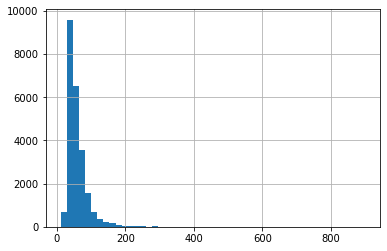

In [41]:
# Построю гистограмму значений общей площади квартир:
data['total_area'].hist(bins=50)

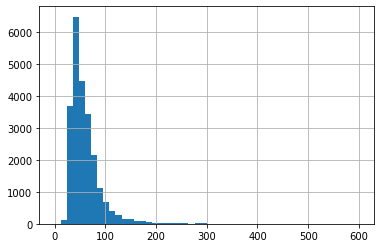

In [42]:
# Ограничу интервал значений общей площади до 600, чтобы увидеть распределение основной массы детальнее:
data['total_area'].hist(bins=50, range=(0, 600))

##### Изучу параметр "цена":

In [43]:
print('Минимальная стоимость квартиры, представленной к продаже:', data['last_price'].min())
print('Максимальная стоимость квартиры, представленной к продаже:', data['last_price'].max())
print('Средняя стоимость всех квартир, представленных к продаже:', round(data['last_price'].mean()))

Минимальная стоимость квартиры, представленной к продаже: 12190
Максимальная стоимость квартиры, представленной к продаже: 763000000
Средняя стоимость всех квартир, представленных к продаже: 6541549.0


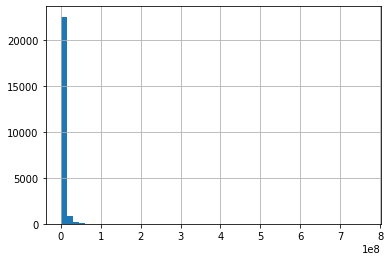

In [44]:
# Построю гистограмму значений цены на квартиры:
data['last_price'].hist(bins=50)

Эта диаграмма вообще не может хоть как-то отобразить реальное распределение значений цены, т.к. разброс очень значительный: от 12 тыс. до 763 млн. Так как 12 тыс. ден. ед. - это нереалистичная цена для любой квартиры - полагаю, это выбивающееся значение. Так же, как и 763 млн. - это слишком огромное значение для цены на квартиру (не дом).

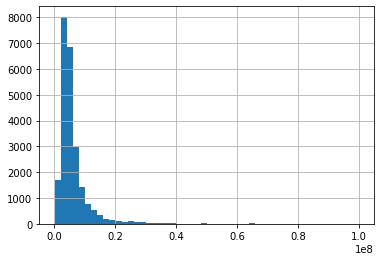

In [45]:
# Попробую ограничить выборку значений до параметра от 200 тыс. до 100 млн. и построить новую гистограмму:
data['last_price'].hist(bins=50, range=(200000, 100000000))

Попробую разбить данные по цене за квартиру на категории, для начала получив средние значения в первой половине интервала (от мин. до медианного значения цены) и во второй половине (от медианы до макс. значения)

In [46]:
print(round(data['last_price'].mean()))
print(round(data['last_price'].median()))

6541549.0
4650000.0


Решил выбрать для проверки всё-таки медианное значения и интервалы от мин. до него и от него до макс.

In [47]:
print(data[data['last_price'] < 4650000]['last_price'].median())
print(data[data['last_price'] > 4650000]['last_price'].median())

3400000.0
6800000.0


Теперь построю 4 гистограммы для распределения значений цены - по 4-м полученным сегментам

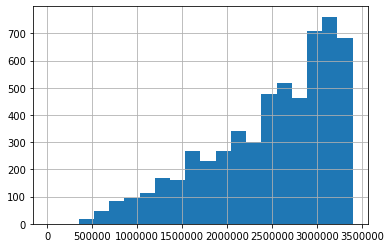

In [48]:
data[data['last_price'] < 3400000]['last_price'].hist(bins=20)

В этом диапазоне сразу видны выбивающиеся значения: скорее всего, информация о цене на квартиры ниже 500 000 - нереалистична и внесена в этот раздел объявлений ("продажа") ошибочно. Можно еще попробовать построить диаграмму размаха, сразу, для этого диапазона, чтобы подтвердить это утверждение:

In [49]:
import matplotlib.pyplot as plt

(12000, 3399999)

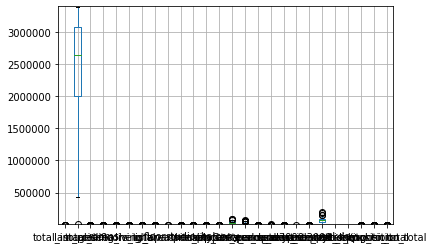

In [50]:
data[data['last_price'] < 3400000].boxplot()
plt.ylim(12000, 3399999)

По-хорошему, исходя из диаграммы размаха и теоретического деления на квартили, к выбросам следовало бы отнести значения цены, не превышающие 1 000 000 руб. Но пока ограничусь 500 000 руб. В дальнейшем еще вернусь к этому параметру.

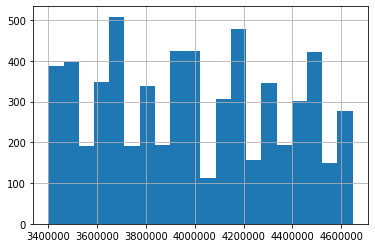

In [51]:
data[(data['last_price'] >= 3400000) & (data['last_price'] < 4650000)]['last_price'].hist(bins=20)

В этом диапазоне цен распределение тоже выглядит весьма интересно, но колебания понятны, т.к. интервал взят совсем небольшой, а других критериев, влияющих на цену, может быть много.

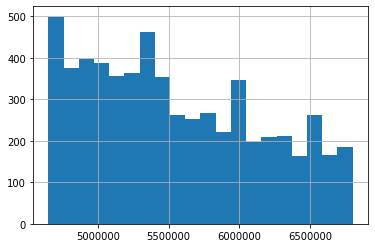

In [52]:
data[(data['last_price'] >= 4650000) & (data['last_price'] < 6800000)]['last_price'].hist(bins=20)

В этом диапазоне также видно, что после медианного значения количество квартир по мере увеличения цены постепенно сокращается. Наблюдается корреляция, которую, впрочем, еще буду изучать позже.

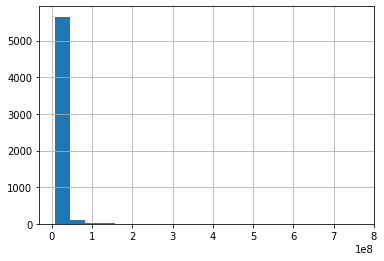

In [53]:
data[data['last_price'] > 6800000]['last_price'].hist(bins=20)

Этот диапазон - загадка. Видно, что есть некое множество значений цен, сильно выбивающихся из общей картины. Попробую также построить диаграмму размаха - возможно, она что-то покажет.

(6800001, 800000000)

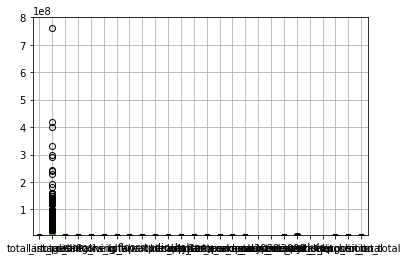

In [54]:
data[data['last_price'] > 6800000].boxplot()
plt.ylim(6800001, 800000000)

Как минимум одно значение точно выбивается из общей картины - максимальная цена на квартиру - ок. 763 млн. руб.! Полагаю, что это либо случайно попавшийся особняк, либо какая-то невероятных размахов квартира в центре Невского проспекта. Ну или в самом Эрмитаже!

Пока оставлю цены.

##### Займусь параметром "число комнат"

In [55]:
print('Минимальное количество комнат в квартирах, выставленных на продажу:', data['rooms'].min())
print('Максимальное количество комнат в квартирах, выставленных на продажу:', data['rooms'].max())
print('Среднее количество комнат в квартирах, выставленных на продажу:', round(data['rooms'].mean()))

Минимальное количество комнат в квартирах, выставленных на продажу: 0
Максимальное количество комнат в квартирах, выставленных на продажу: 19
Среднее количество комнат в квартирах, выставленных на продажу: 2.0


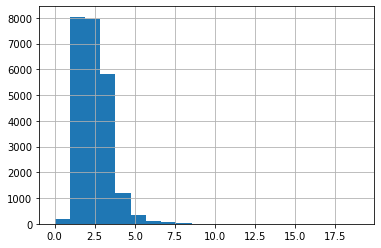

In [56]:
# Построю гистограмму по этому параметру:
data['rooms'].hist(bins=20)

Заметно выбивающееся значение в 19 комнат, которое лежит далеко за основным распределением значений. В общем, я решил проверить цену на квартиру с 19-ю комнатами. Если окажется, что это еще и квартира с максимальной стоимостью, то стоит сразу избавить от нее в изучаемом датафрейме как от сильно выбивающегося значения.

In [57]:
print(data[data['rooms'] == 19]['last_price'])

14498    32250000
Name: last_price, dtype: int64


Нет, это оказалась не эта квартира. Хотя ее цена также находится в зоне "выпадающих" значений, но конкретно к этой зоне вернемся позже. Попробую найти квартиру с максимальной ценой, узнать количество комнат в ней.

In [58]:
data[data['last_price'] == 763000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month_exposition,year_exposition,grouped_floors,living_to_total,kitchen_to_total
12971,19,763000000,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,3,756.0,33.0,1907500.0,5,9,2017,последний,0.625,0.05


Интересно: это квартира с площадью 400 кв.м. и 7-ю комнатами, расположенная на 10 (последнем) этаже. Пока оставлю ее в изучаемом датафрейме, вернусь к выбивающимся значениям позже.

In [59]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

##### Последний параметр, который необходимо изучить, высота потолков:

In [60]:
print('Минимальная высота потолков среди квартир, выставленных на продажу:', data['ceiling_height'].min())
print('Максимальная высота потолков среди квартир, выставленных на продажу:', data['ceiling_height'].max())
print('Средняя высота потолков среди квартир, выставленных на продажу:', round(data['ceiling_height'].mean(), 2))

Минимальная высота потолков среди квартир, выставленных на продажу: 1.0
Максимальная высота потолков среди квартир, выставленных на продажу: 100.0
Средняя высота потолков среди квартир, выставленных на продажу: 2.77


Сразу понятно, что квартир с высотой потолков 1,0 метр в реальности не бывает. От этого значения необходимо будет избавиться. Точно так же, как и от значения высоты потолков в 100 метров. Но пока построю гистограмму.

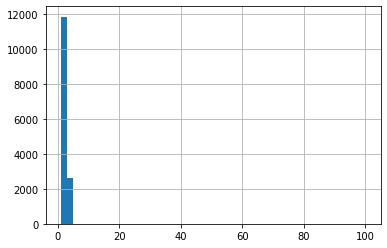

In [61]:
data['ceiling_height'].hist(bins=50)

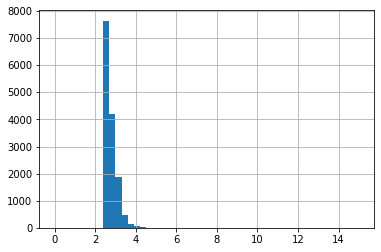

In [62]:
data['ceiling_height'].hist(bins=50, range=(0, 15))

##### Теперь изучу время продажи квартиры:

In [63]:
print('Минимальное время продажи квартир, выставленных на продажу:', data['days_exposition'].min(), 'дн.')
print('Максимальное время продажи квартир, выставленных на продажу:', data['days_exposition'].max(), 'дн.')
print('Среднее время продажи квартир, выставленных на продажу:', round(data['days_exposition'].mean(), 2))
print('Медианное значение срока продажи квартир, выставленных на продажу:', data['days_exposition'].median(), 'дн.')

Минимальное время продажи квартир, выставленных на продажу: 1.0 дн.
Максимальное время продажи квартир, выставленных на продажу: 1580.0 дн.
Среднее время продажи квартир, выставленных на продажу: 180.89
Медианное значение срока продажи квартир, выставленных на продажу: 95.0 дн.


Есть квартиры, проданные всего за 1 день. А вот максимально квартира находилась в продаже более 4-х лет. В среднем квартиры продавались около полугода. Построю гистограмму времени продажи квартир.

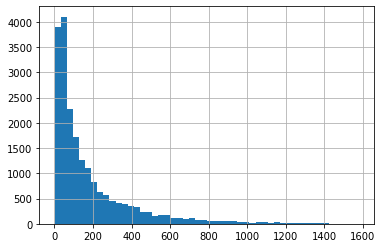

In [64]:
data['days_exposition'].hist(bins=50)

Основная масса квартир продавалась очень быстро: от 1 дня до 2-х (ок. 60 дней) месяцев. Исходя из данного графика медианное значение продажи квартир (95 дней) гораздо реалистичнее отражает усредненное значение этого параметра. А вот срок продажи квартиры свыше 1000 дней - выглядит как необычно долгий. Также следует отметить, что есть определенное количество квартир, в данных о продаже которых вообще не указано количество дней размещения объявлений.
Попробую изучить этот срез данных, выяснив год выставления объявления о продаже этих квартир. Возможно, в срезе есть супер-старые объявления.

In [65]:
data[data['days_exposition'].isna()]['year_exposition'].value_counts()

2019    1796
2018     959
2017     271
2015      70
2016      67
2014      18
Name: year_exposition, dtype: int64

Скорее всего, эти квартиры до сих пор не были проданы. Но это никак не мешает мне посчитать по ним количество дней, в течение которого эти объявления до сих пор активны.

In [66]:
# Переведу сначала все значения столбца days_exposition в список:
days_exposition_list = data['days_exposition'].tolist()
print(len(days_exposition_list))

23699


Добавлю переменную today - означающую сегодняшнюю дату. И пропуски по не проданным до сих пор квартирам можно, в принципе, заменить количеством дней от даты выставления объявления на продажу до сегодняшней даты.

In [67]:
today = pd.to_datetime('today')

In [68]:
# Посчитаю количество пропущенных значений в этом столбце, заодно тоже переведу их в список.
first_day = data[data['days_exposition'].isna()]['first_day_exposition'].reset_index(drop=True)
first_day_list = first_day.tolist()
print(len(first_day_list))

3181


И теперь заполню пропущенные значения в общем списке разницей в днях между датой выставления объявления и до сегодняшней даты. А также переведу все значения в общем списке в целочисленные (int). На проверке - длина списка - она должна совпадать с изначальной.

In [69]:
import math
k = 0
for i in range(len(days_exposition_list)):
    if math.isnan(days_exposition_list[i]) is True:
        days_exposition_list[i] = pd.Timedelta(today - first_day_list[k]).days
        k += 1
    days_exposition_list[i] = int(days_exposition_list[i])
print(len(days_exposition_list))

23699


In [70]:
# И заменю значения в столбце days_exposition на заполненные новые значения из этого списка:
data['days_exposition'] = pd.Series(days_exposition_list)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

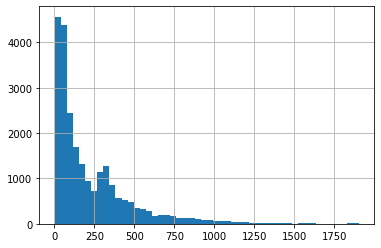

In [72]:
# Посмотрю, как теперь распределились значения на гистограмме:
data['days_exposition'].hist(bins=50)

In [73]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month_exposition,year_exposition,living_to_total,kitchen_to_total
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,8079.000000,23699.000000,9110.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.323374,5.892358,10.373121,0.591080,...,490.804555,0.590911,517.980900,224.210093,9.942166e+04,2.569307,6.400101,2017.367146,0.563854,0.186583
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,21.704811,4.885249,5.721337,0.959298,...,342.317995,0.883999,277.720643,257.712097,5.030680e+04,1.789082,3.491561,1.039771,0.110948,0.075746
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.400000,2.000000,7.200000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.490388,0.133126
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,0.000000,...,455.000000,0.000000,502.000000,124.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.566596,0.172102
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.700000,8.000000,11.500000,1.000000,...,612.000000,1.000000,729.000000,321.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.638298,0.232432
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1904.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.511905,0.787879


Так как следующий параметр для изучения - время продажи квартиры, то я решил уже перед его изучением составить более подходящий датафрейм, убрав выбивающиеся значения по 4-м изученным параметрам:
1. площадь квартиры - считаю, что будет правильным "отсечь" все квартиры с площадью более 150 кв.м.
2. цена квартиры - думаю, что, учитывая изучение квартир в Санкт-Петербурге и Лен.области, а также ввиду распределения большей части значений в пределах +/- 3 млн. от среднего значения (6,5 млн. руб.), то было бы вполне разумным отказаться от значений цены свыше 15 000 000 руб. Как и от значений ниже 500 000 руб.
3. число комнат - учитывая увиденное распределение по этому параметру на гистограмме, решил "отсечь" все квартиры с более, чем 8 комнат
4. количество дней в продаже - по этому значению, как мне кажется можно убрать из датафрейма все объявления старше 3-х лет (1000 дней), так как по ним будет уже очень сложно оценить привлекательность квартиры, скорость продажи, адекватную цену и прочие параметры.

##### Назову новый датафрейм improved_data, т.к. надеюсь на то, что изучаемый датафрейм действительно улучшится.

In [74]:
improved_data = data.query('total_area <= 150 and last_price >= 500000 and last_price <= 15000000 and rooms <= 8 and days_exposition <= 1000')

In [75]:
improved_data = improved_data.reset_index(drop=True)

In [76]:
improved_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22006 entries, 0 to 22005
Data columns (total 29 columns):
total_images            22006 non-null int64
last_price              22006 non-null int64
total_area              22006 non-null float64
first_day_exposition    22006 non-null datetime64[ns]
rooms                   22006 non-null int64
ceiling_height          13344 non-null float64
floors_total            21927 non-null float64
living_area             22006 non-null float64
floor                   22006 non-null int64
is_apartment            22006 non-null bool
studio                  22006 non-null bool
open_plan               22006 non-null bool
kitchen_area            22006 non-null float64
balcony                 22006 non-null int64
locality_name           21961 non-null object
airports_nearest        16599 non-null float64
cityCenters_nearest     16614 non-null float64
parks_around3000        22006 non-null int64
parks_nearest           7042 non-null float64
ponds_around30

Кажется, что отсеченные значения (1691 объявлений) выбраны вполне адекватно и составляют ок. 7% от всего количества исследуемых объявлений.

Так как в дальнейшем будет изучаться влияние того или иного фактора/критерия на цену квартиры, то для наглядности расчетов я бы создал еще один столбец - цена квартиры в млн. руб. - чтобы потом выводились средние значения в нормальном виде, а не в значении экспоненты в степени.

In [77]:
improved_data['price_in_mln'] = improved_data['last_price'] / 1000000

Теперь буду изучать факторы, которые могут влиять на стоимость квартиры.
Первый фактор, на который можно посмотреть, количество комнат - попробую посмотреть, какая будет средняя стоимость квартир, в зависимости от количества комнат.

In [78]:
price_rooms = improved_data.pivot_table(index='rooms', values='price_in_mln')
price_rooms

,price_in_mln
rooms,
0,2.929180
1,3.777312
2,5.171715
3,6.540104
4,7.767961
5,9.539304
6,10.769500
7,13.872500


Судя по сводной таблице, видна прямая зависимость средней цены на квартиру от количества комнат, хотя, кажется, что уровень корреляции несколько снижается при большем количестве комнат.

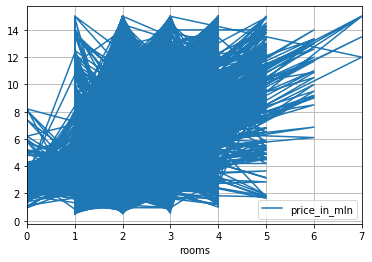

In [79]:
improved_data.plot(x='rooms', y='price_in_mln', grid=True)

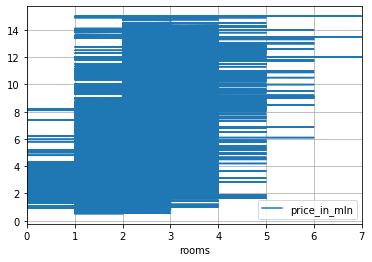

In [80]:
improved_data.sort_values('price_in_mln').plot(x='rooms', y='price_in_mln', grid=True)

Так, с обычным графиком ничего не вышло, даже при сортировке значений цены (их слишком много). Поэтому попробую построить простой график зависимости по сгруппированным значениям:

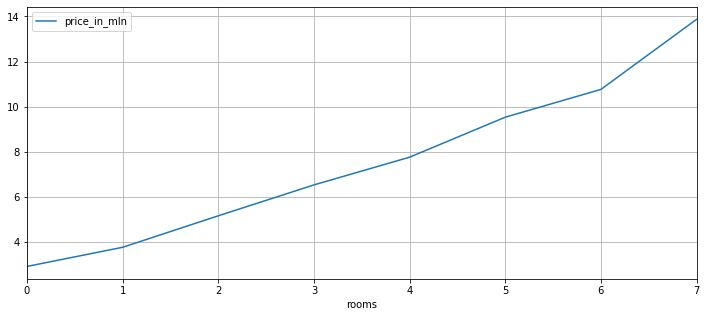

In [81]:
price_rooms.plot(grid=True, figsize=(12, 5))

Зависимость заметна, но непонятно, так ли она сильна.

In [82]:
# Рассчитаю коэффициент корреляции:
print(improved_data['price_in_mln'].corr(improved_data['rooms']))

0.47896988353116476


Зависимость существует, хотя и не очень сильная.

##### Следующий параметр, который может влиять на цену, это площадь квартиры. Изучу его.

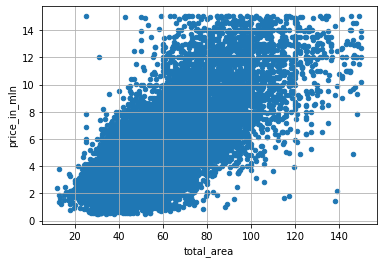

In [83]:
improved_data.plot(x='total_area', y='price_in_mln', kind='scatter', grid=True)

На диаграмме рассеивания заметно, что зависимость также существует, она прямо пропорциональна (цена растёт по мере увеличения площади квартир, выставленных на продажу) и, кажется, что зависимость вполне сильная. Сгруппировать значения по общей площади не получится, т.к. нет интервалов, поэтому попробую просто сразу рассчитать коэффициент Пирсона.

In [84]:
print(improved_data['price_in_mln'].corr(improved_data['total_area']))

0.7430010024694198


Да, корреляция определенно существенная - 0,74.

##### Следующий параметр, который попробую изучить - удаленность от центра.

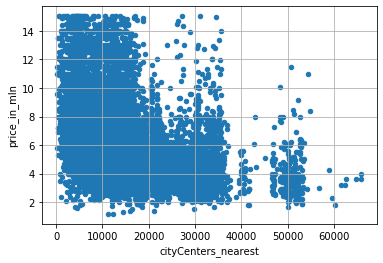

In [85]:
improved_data.plot(x='cityCenters_nearest', y='price_in_mln', kind='scatter', grid=True)

В данном случае зависимость сложнее отследить, т.к. есть большое количество пропущенных значений. То есть, в объявлениях изначально не указывалась удаленность от центров населенных пунктов - то ли намеренно, то ли случайно. Всё равно попробую рассчитать коэффициент корреляции.

In [86]:
print(improved_data['price_in_mln'].corr(improved_data['cityCenters_nearest']))

-0.35466270794282995


Зависимость обратно пропорционально - что логично (чем дальше от центра, тем квартира дешевле). Но, при этом, она достаточно слабо выражена. Но вот если бы данные во всех объявлениях были заполнены, то, думаю, что зависимость выглядела бы существеннее.

##### Теперь изучу влияние этажа, на котором расположена квартира, на ее стоимость.

In [87]:
#сделаю сводную таблицу уже по сгруппированным значениям этажей
improved_data.pivot_table(index='grouped_floors', values='price_in_mln')

,price_in_mln
grouped_floors,
другой,5.324879
первый,4.230957
последний,4.778577


Логично было ожидать, что квартиры на первом и последнем этажах имеют несколько ниже стоимость, чем квартиры на любых других этажах. Построю график зависимости и рассчитаю коэффицент Пирсона (не по сгруппированным значениям, а по стандартным - floor).

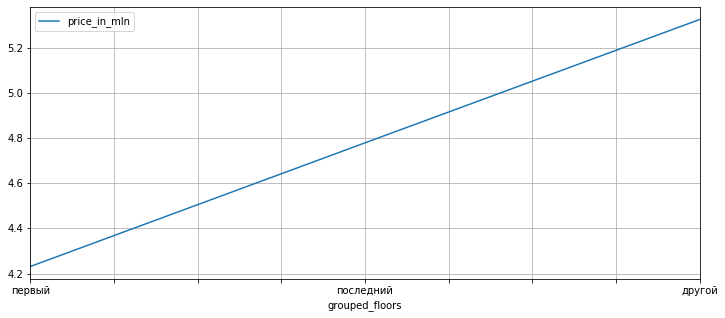

In [88]:
improved_data.pivot_table(index='grouped_floors', values='price_in_mln').sort_values('price_in_mln').plot(grid=True, figsize=(12, 5))

Квартиры на первом этаже имеют самую низкую стоимость, квартиры на последнем - где-то посередине в распределении цен, а выше всего ценятся квартиры на любом другом этаже.

In [89]:
print(improved_data['price_in_mln'].corr(improved_data['floor']))

0.11560539054679549


Интересное наблюдение: при построении графика зависимости от сгруппированных этажей видна прямо пропорциональная зависимость, а вот при расчете коэффицента Пирсона уровень корреляции оказался очень низким - всего 0,116.

##### Далее - зависимость цены от дня недели размещения объявления о продаже:

In [90]:
improved_data.pivot_table(index='weekday', values='price_in_mln')

,price_in_mln
weekday,
0,5.099994
1,5.179960
2,5.141001
3,5.113430
4,5.102351
5,5.012485
6,5.036049


Судя по всему, никакой зависимости в данном случае не наблюдается. Это докажет и расчет коэффициент Пирсона:

In [91]:
print(improved_data['price_in_mln'].corr(improved_data['weekday']))

-0.012204385148714478


##### Теперь посмотрю, есть ли зависимость от месяца размещения объявлений:

In [92]:
improved_data.pivot_table(index='month_exposition', values='price_in_mln')

,price_in_mln
month_exposition,
1,5.058219
2,5.096932
3,5.098487
4,5.220171
5,5.103993
6,4.923335
7,5.142307
8,5.080573
9,5.246142


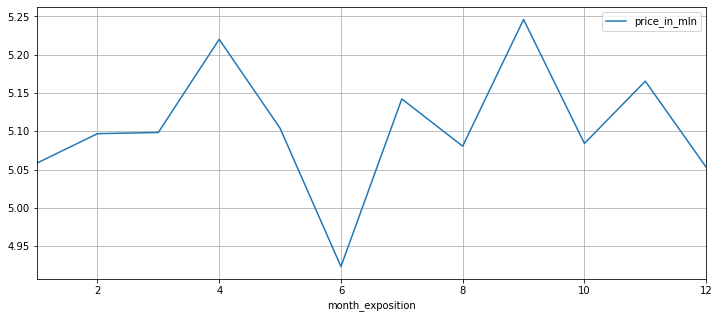

In [93]:
improved_data.pivot_table(index='month_exposition', values='price_in_mln').plot(grid=True, figsize=(12, 5))

В летние месяцы, особенно в июне, наблюдается спад - цена квартир в объявлениях ниже, чем в другие месяцы. Это весьма логично: в летний период недвижимость продаётся или сдаётся несколько хуже. Хотя, например, загородные дома и дачи, по идее, должны продаваться лучше. В любом случае, существенной зависимости, кроме лета, не наблюдается.

In [94]:
improved_data.pivot_table(index='year_exposition', values='price_in_mln')

,price_in_mln
year_exposition,
2014,6.587813
2015,5.458982
2016,5.083185
2017,5.043807
2018,5.030780
2019,5.432734


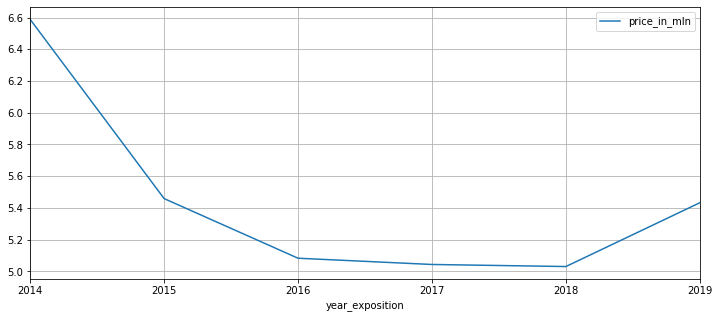

In [95]:
improved_data.pivot_table(index='year_exposition', values='price_in_mln').plot(grid=True, figsize=(12, 5))

Это интересно: в 2014 на фоне девальвации рубля, скорее всего, спрос на квартиры был очень высок - все стремились избавиться от резко падающего в курсе рубля, вложив средства в недвижимость. А затем ситуация выровнялась. Оживление началось в 2018-м году - скорее всего, ввиду стабилизации экономической и финансовой ситуации. Зависимость, при этом, сложно оценить как существенную. Это подтвердит и коэффициент Пирсона:

In [96]:
print(improved_data['price_in_mln'].corr(improved_data['year_exposition']))

0.005075278729429493


##### Для выполнения следующего задания необходимо выбрать 10 населённых пунктов с наибольшим числом объявлений.

In [97]:
improved_data['locality_name'].value_counts().head(10)

Санкт-Петербург      14229
посёлок Мурино         517
посёлок Шушары         436
Всеволожск             385
Пушкин                 342
Колпино                333
посёлок Парголово      324
Гатчина                305
деревня Кудрово        294
Выборг                 233
Name: locality_name, dtype: int64

In [98]:
#Сохраню названия этих 10-ти населенных пунктов в список и сохраню в переменной top10_list:
top10_list = improved_data['locality_name'].value_counts().head(10).index.tolist()
print(top10_list)

['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


In [99]:
#Теперь сделаю срез данных (сохраню в датафрейме top10_data) по ограниченю названия населенного пункта:
top10_data = improved_data.query('locality_name in @top10_list')

И теперь сгруппирую значения цены (средние) по этим 10-ти населённым пунктам. Сразу отсортирую эти значения по убыванию.

In [100]:
top10_data.pivot_table(index='locality_name', values='price_in_mln').sort_values('price_in_mln', ascending=False)

,price_in_mln
locality_name,
Санкт-Петербург,6.024976
Пушкин,5.628817
посёлок Парголово,4.469662
деревня Кудрово,4.233760
посёлок Шушары,4.114374
Колпино,3.860601
Всеволожск,3.729886
посёлок Мурино,3.665115
Гатчина,3.487277


Самая высокая стоимость жилья - в Санкт-Петербурге (закономерно) - в среднем 6.02 млн. руб., самая низкая из первых 10-ти пунктов - в Выборге - в среднем 3.17 млн. руб.

##### Следующий анализ - уже по квартирам в Санкт-Петербурге, для чего выделю датафрейм spb_data.

In [101]:
spb = 'Санкт-Петербург'
spb_data = improved_data.query('locality_name == @spb')
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14229 entries, 0 to 22004
Data columns (total 30 columns):
total_images            14229 non-null int64
last_price              14229 non-null int64
total_area              14229 non-null float64
first_day_exposition    14229 non-null datetime64[ns]
rooms                   14229 non-null int64
ceiling_height          9081 non-null float64
floors_total            14166 non-null float64
living_area             14229 non-null float64
floor                   14229 non-null int64
is_apartment            14229 non-null bool
studio                  14229 non-null bool
open_plan               14229 non-null bool
kitchen_area            14229 non-null float64
balcony                 14229 non-null int64
locality_name           14229 non-null object
airports_nearest        14170 non-null float64
cityCenters_nearest     14186 non-null float64
parks_around3000        14229 non-null int64
parks_nearest           6294 non-null float64
ponds_around300

Добавлю в новый датафрейм новый столбец center_in_km - расчет расстояния до центра в км. Удалю na значения по столбцам с расстоянием, т.к. необходимо исследовать именно расстояние от центра и влияние этого параметра на цену квартиры. После сброса nan-значений можно перевести значения нового столбца center_in_km в целочисленные.

In [102]:
spb_data['center_in_km'] = spb_data['cityCenters_nearest'] / 1000
spb_data = spb_data.dropna(subset=['cityCenters_nearest', 'center_in_km'])
spb_data = spb_data.reset_index(drop=True)
spb_data['center_in_km'] = spb_data['center_in_km'].astype('int')
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14186 entries, 0 to 14185
Data columns (total 31 columns):
total_images            14186 non-null int64
last_price              14186 non-null int64
total_area              14186 non-null float64
first_day_exposition    14186 non-null datetime64[ns]
rooms                   14186 non-null int64
ceiling_height          9060 non-null float64
floors_total            14124 non-null float64
living_area             14186 non-null float64
floor                   14186 non-null int64
is_apartment            14186 non-null bool
studio                  14186 non-null bool
open_plan               14186 non-null bool
kitchen_area            14186 non-null float64
balcony                 14186 non-null int64
locality_name           14186 non-null object
airports_nearest        14170 non-null float64
cityCenters_nearest     14186 non-null float64
parks_around3000        14186 non-null int64
parks_nearest           6294 non-null float64
ponds_around300

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
# Посчитаю среднюю цену для каждого километра удаленности от центра:
spb_data.pivot_table(index='center_in_km', values='price_in_mln')

,price_in_mln
center_in_km,
0,9.281000
1,9.123640
2,8.463227
3,8.220415
4,8.598066
5,7.930921
6,7.534826
7,7.290983
8,6.773934


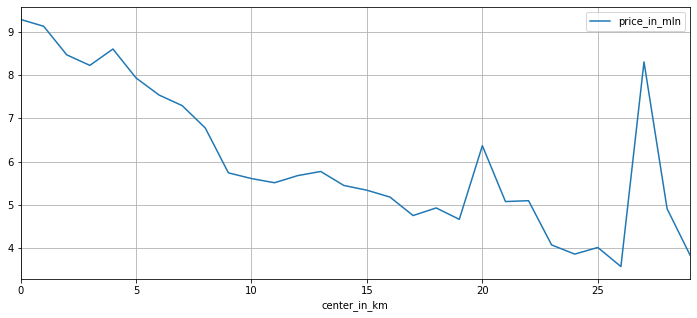

In [104]:
# Построю график, показывающий зависимость цены от удалённоти от центра (в км):
spb_data.pivot_table(index='center_in_km', values='price_in_mln').plot(grid=True, figsize=(12, 5))

Из графика видно, что цена, в целом, снижается по мере того, как расположение квартир удаляется от центра. Есть резкий скачок в 27-ми км от центра, но можно предположить, что это какой-то элитный жилой комплекс или целый район с элитной недвижимостью, поэтому стоимость жилья там выше.
Также из графика видно, что после отметки в 4-5 км от центра цена начинает резко снижаться. Можно предположить, что где-то в интервале от 4 до 5 км от центра и заканчивается центральная зона. Буду считать ее всё-таки в пределах 5-ти км - круглой цифры.

In [105]:
central_data = spb_data.query('center_in_km <= 5').reset_index(drop=True)
central_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 31 columns):
total_images            2046 non-null int64
last_price              2046 non-null int64
total_area              2046 non-null float64
first_day_exposition    2046 non-null datetime64[ns]
rooms                   2046 non-null int64
ceiling_height          1317 non-null float64
floors_total            2043 non-null float64
living_area             2046 non-null float64
floor                   2046 non-null int64
is_apartment            2046 non-null bool
studio                  2046 non-null bool
open_plan               2046 non-null bool
kitchen_area            2046 non-null float64
balcony                 2046 non-null int64
locality_name           2046 non-null object
airports_nearest        2044 non-null float64
cityCenters_nearest     2046 non-null float64
parks_around3000        2046 non-null int64
parks_nearest           1287 non-null float64
ponds_around3000        2046 non-n

Итак, количество квартир, расположенных в центральной зоне Санкт-Петербурга, всего 2046. Теперь изучу параметры по этому датафрейму: площадь, цену, число комнат, высоту потолков.

In [106]:
print('Средняя площадь квартир, расположенных в центре СПб:', round(central_data['total_area'].mean(), 2) , 'кв.м.')
print('Минимальная площадь квартиры из расположенных в центре СПб:', round(central_data['total_area'].min(), 2), 'кв.м.')
print('Максимальная площадь квартиры из расположенных в центре СПб:', round(central_data['total_area'].max(), 2), 'кв.м.')
print('Общая площадь всех квартир, расположенных в центре СПб:', round(central_data['total_area'].sum(), 2), 'кв.м.')

Средняя площадь квартир, расположенных в центре СПб: 72.96 кв.м.
Минимальная площадь квартиры из расположенных в центре СПб: 12.0 кв.м.
Максимальная площадь квартиры из расположенных в центре СПб: 150.0 кв.м.
Общая площадь всех квартир, расположенных в центре СПб: 149268.66 кв.м.


Сделаю сравнительную табличку по площади квартир: для сравнения этого параметра у всех квартир в СПб и у квартир, расположенных в центре.

In [107]:
indeces_area = ['Мин. площадь', 'Макс. площадь', 'Средняя площадь', 'Общая площадь']
columns_area = ['Все квартиры в СПб', 'Квартиры в центре СПб']
area_list = [[round(spb_data['total_area'].min(), 2), round(central_data['total_area'].min(), 2)], [round(spb_data['total_area'].max(), 2), round(central_data['total_area'].max(), 2)], [round(spb_data['total_area'].mean(), 2), round(central_data['total_area'].mean(), 2)], [round(spb_data['total_area'].sum(), 2), round(central_data['total_area'].sum(), 2)]]
total_area_compar = pd.DataFrame(data=area_list, columns=columns_area, index=indeces_area)
total_area_compar

,Все квартиры в СПб,Квартиры в центре СПб
Мин. площадь,12.00,12.00
Макс. площадь,150.00,150.00
Средняя площадь,56.63,72.96
Общая площадь,803346.35,149268.66


Квартиры с минимальной и максимальной площадями, как выяснилось, расположены в центре. А вот средняя площаль квартир в центре больше, чем в среднем у всех квартир в Санкт-Петербурге.

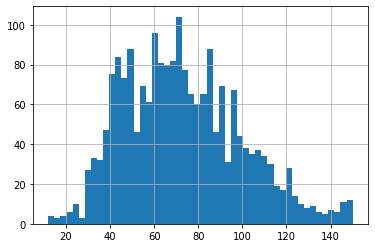

In [108]:
# Построю еще для наглядности график распределения площади квартир в центре
central_data['total_area'].hist(bins=50)

##### Теперь посмотрю на цену квартир, расположенных в центре СПб:

In [109]:
print('Минимальная стоимость квартиры, расположенной в центре:', central_data['price_in_mln'].min(), 'млн.')
print('Максимальная стоимость квартиры, расположенной в центре:', central_data['price_in_mln'].max(), 'млн.')
print('Средняя стоимость всех квартир, расположенных в центре:', round(central_data['price_in_mln'].mean()), 'млн.')

Минимальная стоимость квартиры, расположенной в центре: 1.6 млн.
Максимальная стоимость квартиры, расположенной в центре: 15.0 млн.
Средняя стоимость всех квартир, расположенных в центре: 8.0 млн.


In [110]:
# Сделаю снова сравнительную таблицу для сравнения цен квартир по всему городу и квартир в центре:
indeces_price = ['Мин. цена', 'Макс. цена', 'Средняя цена']
columns_price = ['Все квартиры в СПб', 'Квартиры в центре СПб']
price_list = [[spb_data['price_in_mln'].min(), central_data['price_in_mln'].min()], [spb_data['price_in_mln'].max(), central_data['price_in_mln'].max()], [round(spb_data['price_in_mln'].mean()), round(central_data['price_in_mln'].mean())]]
total_price_compar = pd.DataFrame(data=price_list, columns=columns_price, index=indeces_price)
total_price_compar

,Все квартиры в СПб,Квартиры в центре СПб
Мин. цена,1.19,1.6
Макс. цена,15.00,15.0
Средняя цена,6.00,8.0


Минимальная цена поменялась, а самая дорогая квартира, что логично, находится в центре. Средняя цена за квартиры в центре также выше, чем за квартиры во всём городе - на 2 млн. руб.

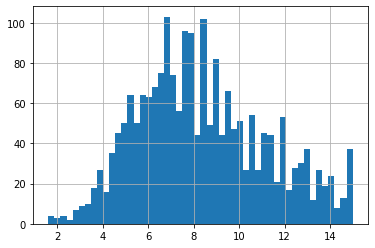

In [111]:
# Построю еще для наглядности график распределения цены на квартиры в центре
central_data['price_in_mln'].hist(bins=50)

##### Посмотрю на ситуацию с количеством комнат в квартирах в центре города

In [112]:
print('Минимальное количество комнат в квартирах в центре СПб:', central_data['rooms'].min())
print('Максимальное количество комнат в квартирах в центре СПб:', central_data['rooms'].max())
print('Среднее количество комнат в квартирах в квартирах в центре СПб:', round(central_data['rooms'].mean(), 2))

Минимальное количество комнат в квартирах в центре СПб: 0
Максимальное количество комнат в квартирах в центре СПб: 7
Среднее количество комнат в квартирах в квартирах в центре СПб: 2.54


Посмотрю на распределение квартир в зависимости от количества комнат, в обоих датафреймах - в центральной зоне и в целом по Санкт-Петербургу

In [113]:
central_data['rooms'].value_counts()

2    675
3    626
1    362
4    274
5     85
6     10
0     10
7      4
Name: rooms, dtype: int64

In [114]:
spb_data['rooms'].value_counts()

2    4845
1    4842
3    3592
4     660
5     118
0     107
6      18
7       4
Name: rooms, dtype: int64

В этот раз сразу для наглядности посмотрю график распределения квартир, в зависимости от количества комнат - как в центре, так и во всём городе.

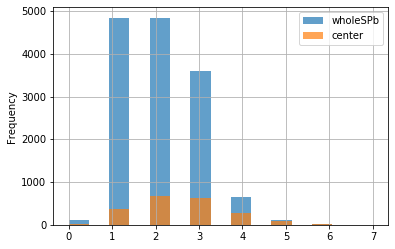

In [115]:
ax = spb_data.plot(kind='hist', y='rooms', bins=15, linewidth=5, alpha=0.7, label='wholeSPb')
central_data.plot(kind='hist', y='rooms', bins=15, linewidth=5, alpha=0.7, label='center', ax=ax, grid=True, legend=True)

Заметно, что в центре больше квартир с 2-мя и 3-мя комнатами. И среднее значение (2.54) как раз находится между этими цифрами. Тогда как во всём городе больше всего доля одно- и двух-комнатных квартир.

Заодно сразу проверю влияние данного параметра на среднюю цену квартир - опять, в сравнении между всеми квартирами из СПб, выставленными на продажу, и квартирами в центре города.

In [116]:
central_rooms_price = central_data.pivot_table(index=['rooms'], values='price_in_mln')
spb_rooms_price = spb_data.pivot_table(index=['rooms'], values='price_in_mln')
rooms_price_comparison = spb_rooms_price.merge(central_rooms_price, on='rooms', how='left')
rooms_price_comparison.columns = ['Ср. цена в СПб', 'Ср. цена в центре СПб']
rooms_price_comparison

,Ср. цена в СПб,Ср. цена в центре СПб
rooms,,
0,3.443631,4.117600
1,4.381918,6.193666
2,6.158167,7.919995
3,7.490535,9.055108
4,8.498327,10.035529
5,10.454136,11.080106
6,11.155000,11.491100
7,13.872500,13.872500


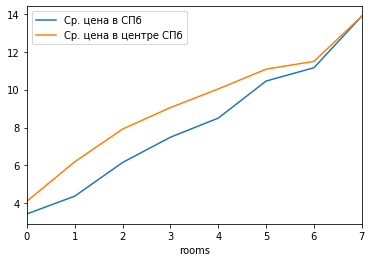

In [117]:
rooms_price_comparison.plot()

Общий тренд влияния количества комнат на стоимость квартиры подтвердился и для квартир, расположенных в центре города. При этом, уровень средней цены квартир в разрезе количества комнат в центральной зоне выше, что также логично.
Рассчитаю еще коэффициенты корреляции для этих 2-х датафреймов.

In [118]:
print('Для всего СПб:', spb_data['price_in_mln'].corr(spb_data['rooms']))
print('Для центра СПб:', central_data['price_in_mln'].corr(central_data['rooms']))

Для всего СПб: 0.5370205058347661
Для центра СПб: 0.4821010523426602


Видно, что в центральной зоне количество комнат имеет несколько сниженное влияние на стоимость квартиры.

Осталось еще изучить параметр высоты потолков и сравнить его с тем же показателям в целом для квартир в Санкт-Петербурге

In [119]:
print('Минимальная высота потолков среди квартир в центре СПб:', central_data['ceiling_height'].min())
print('Максимальная высота потолков среди квартир в центре СПб:', central_data['ceiling_height'].max())
print('Средняя высота потолков среди квартир в центре СПб:', round(central_data['ceiling_height'].mean(), 2))

Минимальная высота потолков среди квартир в центре СПб: 2.4
Максимальная высота потолков среди квартир в центре СПб: 32.0
Средняя высота потолков среди квартир в центре СПб: 3.12


In [120]:
indeces_ceiling = ['Мин. высота', 'Макс. высота', 'Средняя высота']
columns_ceiling = ['Все квартиры в СПб', 'Квартиры в центре СПб']
ceiling_list = [[spb_data['ceiling_height'].min(), central_data['ceiling_height'].min()], [spb_data['ceiling_height'].max(), central_data['ceiling_height'].max()], [round(spb_data['ceiling_height'].mean(), 2), round(central_data['ceiling_height'].mean(), 2)]]
ceiling_compar = pd.DataFrame(data=ceiling_list, columns=columns_ceiling, index=indeces_ceiling)
ceiling_compar

,Все квартиры в СПб,Квартиры в центре СПб
Мин. высота,1.00,2.40
Макс. высота,100.00,32.00
Средняя высота,2.77,3.12


По поводу максимальной высоты: 100 метров - это, естественно, выпадающее значение, но я не мог избавиться от таких для этого параметра ввиду отсутствия заполненной информации по высоте потолков у многих квартир. То же самое касается и минимальной высоты: понятное дело, что квартиры с высотой в 1 метр вряд ли существуют, и это, скорее всего, ошибочно внесённые данные.
Зато средний показатель получился вполне адекватным, и у квартир в центре Санкт-Петербурга этот параметр несколько выше: 3.12 метра против 2.77 метра.

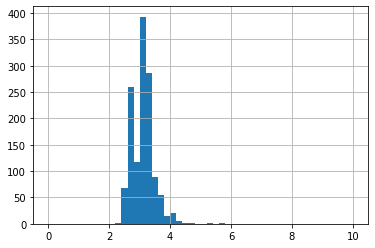

In [121]:
# Построю еще для наглядности график распределения квартир в центре в зависимости от высоты потолков:
# (сразу ограничу распределение высоты значением в 10 метров)
central_data['ceiling_height'].hist(bins=50, range=(0, 10))

Теперь проанализирую влияние этажа, на котором расположены квартиры, на ее стоимость - сразу в сравнении между всеми квартирами в Санкт-Петербурге и квартирами, расположенными в центре. Только при объединении сводных таблиц поставлю тип соединения inner, чтобы убрать значения по тем этажам, которые в центре проверить не получится - в центре этажность явно ниже.

In [122]:
central_floor_price = central_data.pivot_table(index=['floor'], values='price_in_mln')
spb_floor_price = spb_data.pivot_table(index=['floor'], values='price_in_mln')
floor_price_comparison = spb_floor_price.merge(central_floor_price, on='floor', how='inner')
floor_price_comparison.columns = ['Ср. цена в СПб', 'Ср. цена в центре СПб']
floor_price_comparison

,Ср. цена в СПб,Ср. цена в центре СПб
floor,,
1,5.256161,6.951097
2,6.236937,8.619753
3,6.219900,8.409590
4,6.257689,8.656467
5,5.870256,8.684458
6,6.158414,8.442662
7,5.890889,8.690062
8,5.793967,9.132541
9,5.641782,8.534600


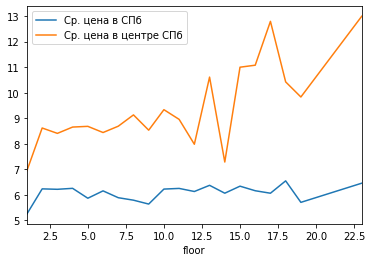

In [123]:
floor_price_comparison.plot()

Общий тренд - на увеличение стоимости, по сравнению с первым этажом. Есть выпады у показателей 12-го и 14-го этажа для квартир в центре - скорее всего, это просто последние этажи в домах, поэтому их стоимость несколько ниже, чем других. Еще посчитаю коэффициенты Пирсона для обоих датафреймов (уверен, зависимость будет слабой) и составлю сравнительную таблицу по сгруппированным значениям этажей - по группам "первый", "последний" и "другой".

In [124]:
print('Для всего СПб:', spb_data['price_in_mln'].corr(spb_data['floor']))
print('Для центра СПб:', central_data['price_in_mln'].corr(central_data['floor']))

Для всего СПб: 0.046382203096514564
Для центра СПб: 0.13829809340261753


In [125]:
central_grouped_floor_price = central_data.pivot_table(index=['grouped_floors'], values='price_in_mln')
spb_grouped_floor_price = spb_data.pivot_table(index=['grouped_floors'], values='price_in_mln')
grouped_floor_price_comparison = spb_grouped_floor_price.merge(central_grouped_floor_price, on='grouped_floors', how='left')
grouped_floor_price_comparison.columns = ['Ср. цена в СПб', 'Ср. цена в центре СПб']
grouped_floor_price_comparison.sort_values('Ср. цена в центре СПб')

,Ср. цена в СПб,Ср. цена в центре СПб
grouped_floors,,
первый,5.256161,6.951097
другой,6.117560,8.616229
последний,6.077236,8.640041


Интересное наблюдение: если в целом по Санкт-Петербургу цены распределились так же, как и по всему датафрейму квартир: квартиры на первом этаже - дешевле всего, квартиры на последнем этаже - чуть дороже, квартиры на любом другом этаже - дороже всего, то в центре получилось так, что квартиры на последнем этаже оказались даже с чуть более высокой средней ценой (8.64 млн. против 8.62 млн.). Полагаю, что в центре ценятся квартиры на последних этажах. А, возможно, это вообще пентхаусы.

##### Изучу влияние показателя удалённости от центра на стоимость квартир - сразу в сравнение между квартирами в центре и квартирами во всём городе.

In [126]:
central_distance_price = central_data.pivot_table(index=['center_in_km'], values='price_in_mln')
spb_distance_price = spb_data.pivot_table(index=['center_in_km'], values='price_in_mln')
distance_price_comparison = spb_distance_price.merge(central_distance_price, on='center_in_km', how='left')
distance_price_comparison.columns = ['Ср. цена в СПб', 'Ср. цена в центре СПб']
distance_price_comparison

,Ср. цена в СПб,Ср. цена в центре СПб
center_in_km,,
0,9.281000,9.281000
1,9.123640,9.123640
2,8.463227,8.463227
3,8.220415,8.220415
4,8.598066,8.598066
5,7.930921,7.930921
6,7.534826,NaN
7,7.290983,NaN
8,6.773934,NaN


С этим параметром сравнивать бесмыссленно, т.к. он одинаков для первых 5-ти километров удалённости от центра - ведь я сам определил зону в радиусе 5-ти километров как центральную. График можно построить лишь для наглядности: чем дальше от центра, тем цена будет ниже. Коэффициент Пирсона, при этом, у всех квартир в СПб будет, скорее всего, выше, чем у квартир в центре, т.к. эти квартиры уже в центре.

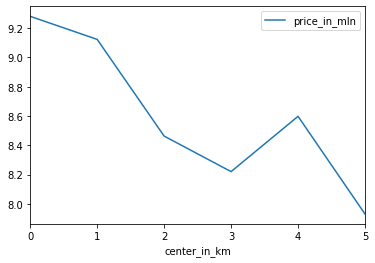

In [127]:
central_distance_price.plot()

In [128]:
print('Для всего СПб:', spb_data['price_in_mln'].corr(spb_data['center_in_km']))
print('Для центра СПб:', central_data['price_in_mln'].corr(central_data['center_in_km']))

Для всего СПб: -0.3838357804288401
Для центра СПб: -0.09810477476076038


Так и есть: в самом центре уже действуют немного другие законы. Возможно, это количество этажей в доме, наличие парковок, парков, прудов и проч. Выход окон на загруженные улицы также может повлиять (негативно) на стоимость квартир. Поэтому корреляция с расстоянием уже в самом центре - низкая. И связь, понятное дело, обратно пропорциональна: чем дальше от центра, тем ниже цена.

##### И, наконец, последний параметр, влияние которого на цену можно изучить, - это дата размещения объявления. Не очень понятно, как лучше оценить, но попробую просто построить график.

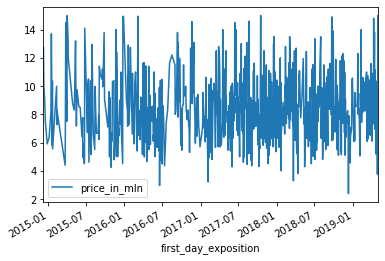

In [129]:
central_data.pivot_table(index=['first_day_exposition'], values='price_in_mln').plot()

Как и предполагалось, видимой зависимости нет. Сравню еще этот показатель с аналогичным для квартир во всём городе.

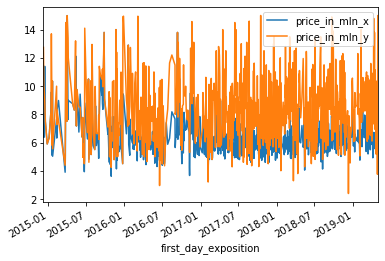

In [130]:
central_date_price = central_data.pivot_table(index=['first_day_exposition'], values='price_in_mln')
spb_date_price = spb_data.pivot_table(index=['first_day_exposition'], values='price_in_mln')
date_price_comparison = spb_date_price.merge(central_date_price, on='first_day_exposition', how='inner')
date_price_comparison.plot()

То же самое: зависимости нет.

### Шаг 5. Общий вывод

1. Изучена база объявлений о продаже квартир. В изначальном варианте датафрейма - 23699 объявлений (строк/записей), 22 столбца. Есть пропущенные значения в 14 столбцах. Типы данных в некоторых столбцах необходимо будет заменить.
2. Заполнение пропущенных значений проходило по-разному:
    - в столбцах с булевым значением (например, is_apartment) все NaN были заменены на False;
    - в столбце balcony все пропущенные значения были заменены на 0 - сделано предположение, что отсутствие информации о количестве балконов подразумевает, в целом, отсутствие балконов;
    - пропущенные значения площади кухни и жилой зоны в квартирах были заменены на медианные значения, полученные по квартирам в разрезе количества комнат: по каждому варианту с количеством комнат были рассчитаны эти медианные значения и затем вставлены на место пропущенных по заданному условию (количеству комнат);
    - отсутствующие значения по количеству парков и прудов в радиусе 3 км от квартиры были заменены на 0 - согласно предположению, что парков и прудов в таком радиусе нет, раз информация по ним отсутствует;
    - позже, уже в разделе исследовательского анализа, были заполнены пропуски по времени продажи квартиры: для всех объявлений было посчитано количество дней нахождения объявления в базе вплоть до текущей даты;
3. Посчитаны и добавлены в таблицу следующие столбцы:
    * цена квадратного метра ('price_per_sqm');
    * день недели ('weekday'), месяц ('month_exposition') и год публикации ('year_exposition') объявления;
    * этаж квартиры; варианты — первый, последний, другой ('grouped_floors');
    * соотношение жилой и общей площади ('living_to_total');
    * отношение площади кухни к общей ('kitchen_to_total');
4.  Была произведена замена типов данных, как на целочисленные значения - там, где необходимо, так и на datetime (в столбце 'first_day_exposition').
5. Изучены параметры:
    площадь:
        Средняя площадь всех квартир, представленных к продаже: 60.35 кв.м.
        Минимальная площадь квартиры, представленной к продаже: 12.0 кв.м.
        Максимальная площадь квартиры, представленной к продаже: 900.0 кв.м.
        Общая площадь всех квартир, представленных к продаже: 1430202.68 кв.м.
    цена:
        Минимальная стоимость квартиры, представленной к продаже: 12190
        Максимальная стоимость квартиры, представленной к продаже: 763000000
        Средняя стоимость всех квартир, представленных к продаже: 6541549.0
    число комнат:
        Минимальное количество комнат в квартирах, выставленных на продажу: 0 (студии)
        Максимальное количество комнат в квартирах, выставленных на продажу: 19
        Среднее количество комнат в квартирах, выставленных на продажу: 2.0
    высота потолков:
        Минимальная высота потолков среди квартир, выставленных на продажу: 1.0
        Максимальная высота потолков среди квартир, выставленных на продажу: 100.0
        Средняя высота потолков среди квартир, выставленных на продажу: 2.77
6. Для каждого из перечисленных параметров построены гистограммы.
7. Изучен параметр "время продажи квартиры":
        Минимальное время продажи квартир, выставленных на продажу: 1.0 дн.
        Максимальное время продажи квартир, выставленных на продажу: 1580.0 дн.
        Среднее время продажи квартир, выставленных на продажу: 180.89
        Медианное значение срока продажи квартир, выставленных на продажу: 95.0 дн.
    Вывод: Основная масса квартир продавалась очень быстро: от 1 дня до 2-х (ок. 60 дней) месяцев. Исходя из данного графика медианное значение продажи квартир (95 дней) гораздо реалистичнее отражает усредненное значение этого параметра. А вот срок продажи квартиры свыше 1000 дней - выглядит как необычно долгий. Также следует отметить, что есть определенное количество квартир, в данных о продаже которых вообще не указано количество дней размещения объявлений. Попробую изучить этот срез данных, выяснив год выставления объявления о продаже этих квартир. Возможно, в срезе есть супер-старые объявления.
8. Был сделан срез данных - в виде улучшенного датафрейма (imroved_data), без выпадающих значений, и со следующими ограничениями:
    - площадь квартиры - только с площадью, не превышающей 150 кв.м.
    - цена квартиры - только значения от 500 тыс. руб. до 15 млн. руб.;
    - число комнат - квартиры с не более, чем 8 комнат;
    - количество дней в продаже - объявления не старше 1000 дней;
9. Было изучено влияние на цену следующих параметров:
    - квадратного метра: зависимость высокая (к-т Пирсона = 0.74), прямо пропорциональна;
    - числа комнат: зависимость прямо пропорциональна, не так высока (к-т Пирсона = 0.48);
    - этажа (первого или последнего): зависимость крайне слабая, т.к. цена отличается существенно только для первого этажа (ниже), менее существенно для последнего этажа и совсем не отличается для любого другого этажа. К-т Пирсона = 0.116.
    - удалённости от центра: зависимость обратно пропорциональна - чем дальше от центра, тем квартира дешевле. Но, при этом, она достаточно слабо выражена (К = -0,35). Но вот если бы данные во всех объявлениях были заполнены, то, думаю, что зависимость выглядела бы существеннее.
10. Изучил зависимость от даты размещения:
    - дня недели: зависимости практически нет (К = -0.012);
    - месяца: в летние месяцы, особенно в июне, наблюдается спад - цена квартир в объявлениях ниже, чем в другие месяцы. Это весьма логично: в летний период недвижимость продаётся или сдаётся несколько хуже. При этом, существенной зависимости от месяца, кроме как летом, не наблюдается.
    - года: зависимость несущественна (К = 0.005). 
11. Были выбраны 10 населённых пунктов с наибольшим числом объявлений:
    Санкт-Петербург
    посёлок Мурино
    посёлок Шушары
    Всеволожск
    Пушкин
    Колпино
    посёлок Парголово
    Гатчина
    деревня Кудрово
    Выборг
    По ним посчитаны средняя цену квадратного метра. Самая высокая стоимость жилья - в Санкт-Петербурге (закономерно) - в среднем 6.02 млн. руб., самая низкая из первых 10-ти пунктов - в Выборге - в среднем 3.17 млн. руб.
12. Выделены квартиры только в Санкт-Петербурге - датафрейм spb_data (14186 объявлений), а также квартиры, расположенные в центральной зоне Санкт-Петербурга (2046 объявлений).
13. Для квартир в центре Санкт-Петербурга были изучены следующие параметры, значения по которым сразу же были поставлены в сравнение с общими значениями по Санкт-Петербургу:
     площадь:
        Средняя площадь квартир, расположенных в центре СПб: 72.96 кв.м.
        Минимальная площадь квартиры из расположенных в центре СПб: 12.0 кв.м.
        Максимальная площадь квартиры из расположенных в центре СПб: 150.0 кв.м.
        Общая площадь всех квартир, расположенных в центре СПб: 149268.66 кв.м.
    Квартиры с минимальной и максимальной площадями, как выяснилось, расположены в центре. А вот средняя площаль квартир в центре больше, чем в среднем у всех квартир в Санкт-Петербурге.
    
    цена:
        Минимальная стоимость квартиры, расположенной в центре: 1.6 млн.
        Максимальная стоимость квартиры, расположенной в центре: 15.0 млн.
        Средняя стоимость всех квартир, расположенных в центре: 8.0 млн.
    Минимальная цена поменялась, а самая дорогая квартира, что логично, находится в центре. Средняя цена за квартиры в центре также выше, чем за квартиры во всём городе - на 2 млн. руб.
    
    число комнат:
        Минимальное количество комнат в квартирах, выставленных на продажу: 0 (студии)
        Максимальное количество комнат в квартирах, выставленных на продажу: 19
        Среднее количество комнат в квартирах, выставленных на продажу: 2.0
    В центре больше квартир с 2-мя и 3-мя комнатами. И среднее значение (2.54) как раз находится между этими цифрами. Тогда как во всём городе больше всего доля одно- и двух-комнатных квартир.
    
    высота потолков:
        Минимальная высота потолков среди квартир в центре СПб: 2.4
        Максимальная высота потолков среди квартир в центре СПб: 32.0
        Средняя высота потолков среди квартир в центре СПб: 3.12
    По поводу максимальной высоты: 100 метров - это, естественно, выпадающее значение, но я не мог избавиться от таких для этого параметра ввиду отсутствия заполненной информации по высоте потолков у многих квартир. То же самое касается и минимальной высоты: понятное дело, что квартиры с высотой в 1 метр вряд ли существуют, и это, скорее всего, ошибочно внесённые данные. Зато средний показатель получился вполне адекватным, и у квартир в центре Санкт-Петербурга этот параметр несколько выше: 3.12 метра против 2.77 метра.
        
14. Было проанализировано влияние следующих факторов на стоимость квартиры: число комнат (К=0.48), этаж (К=0.14), удалённость от центра (К=-0.098), дата размещения объявления (зависимости нет).